In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('ForbesTop2017.csv')

In [2]:
# Data Cleaning
# Drop the unnamed column
df.drop(columns=['Unnamed: 0'], inplace=True)
# Fill missing values in the "Sector" and "Industry" columns with "Unknown"
df['Sector'].fillna('Unknown', inplace=True)
df['Industry'].fillna('Unknown', inplace=True)

In [3]:
# Basic Statistics
summary_stats = df.describe()
print(summary_stats)

              Rank        Sales      Profits       Assets  Market Value
count  2000.000000  2000.000000  2000.000000  2000.000000   2000.000000
mean   1000.500000    17.664510     1.240713    84.533547     24.417845
std     577.494589    29.320116     2.918742   260.984489     44.761400
min       1.000000     0.001000   -13.000000     0.001000      0.072000
25%     500.750000     4.000000     0.318000    10.875000      6.600000
50%    1000.500000     8.800000     0.613000    22.900000     11.950000
75%    1500.250000    17.425000     1.300000    52.400000     24.400000
max    2000.000000   485.300000    45.200000  3473.200000    752.000000


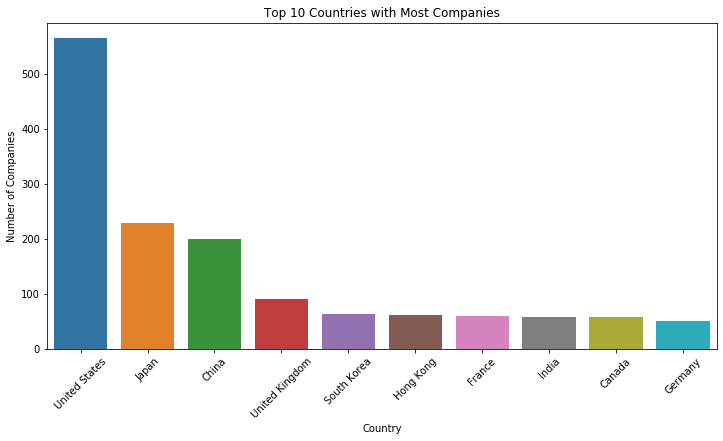

In [4]:
# Exploratory Data Analysis (EDA)

# Count of companies by country
plt.figure(figsize=(12, 6))
company_counts_by_country = df['Country'].value_counts().head(10)
sns.barplot(x=company_counts_by_country.index, y=company_counts_by_country.values)
plt.title('Top 10 Countries with Most Companies')
plt.xlabel('Country')
plt.ylabel('Number of Companies')
plt.xticks(rotation=45)
plt.show()


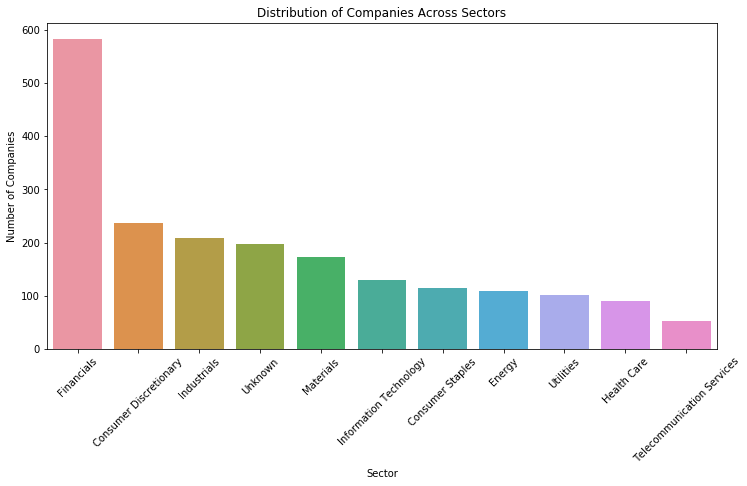

In [5]:
# Distribution of companies across sectors
plt.figure(figsize=(12, 6))
sector_distribution = df['Sector'].value_counts()
sns.barplot(x=sector_distribution.index, y=sector_distribution.values)
plt.title('Distribution of Companies Across Sectors')
plt.xlabel('Sector')
plt.ylabel('Number of Companies')
plt.xticks(rotation=45)
plt.show()

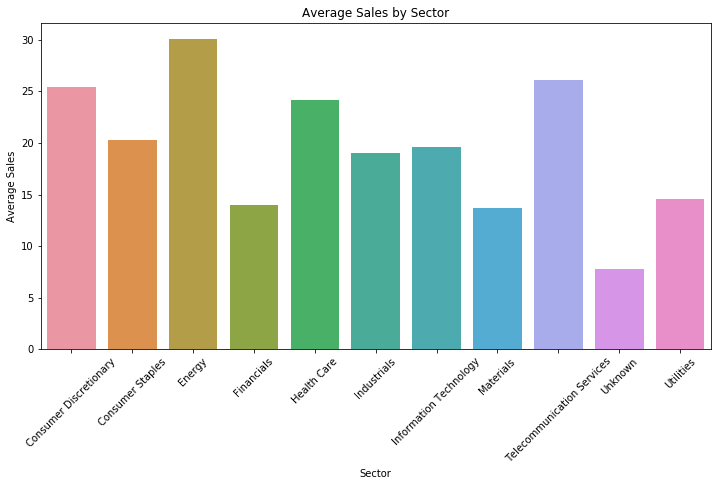

In [10]:
# Average metrics by sector
avg_by_sector = df.groupby('Sector').agg({
    'Sales': 'mean',
    'Profits': 'mean',
    'Assets': 'mean',
    'Market Value': 'mean'
}).reset_index()

# Plotting average Sales by sector
plt.figure(figsize=(12, 6))
sns.barplot(x=avg_by_sector['Sector'], y=avg_by_sector['Sales'])
plt.title('Average Sales by Sector')
plt.xlabel('Sector')
plt.ylabel('Average Sales')
plt.xticks(rotation=45)
plt.show()

In [11]:
# Similarly, you can create plots for Profits, Assets, and Market Value

# Top 10 companies by various metrics
def plot_top_10(metric):
    plt.figure(figsize=(12, 6))
    top_10 = df.sort_values(by=metric, ascending=False).head(10)
    sns.barplot(x=top_10['Company'], y=top_10[metric])
    plt.title(f'Top 10 Companies by {metric}')
    plt.xlabel('Company')
    plt.ylabel(metric)
    plt.xticks(rotation=45)
    plt.show()

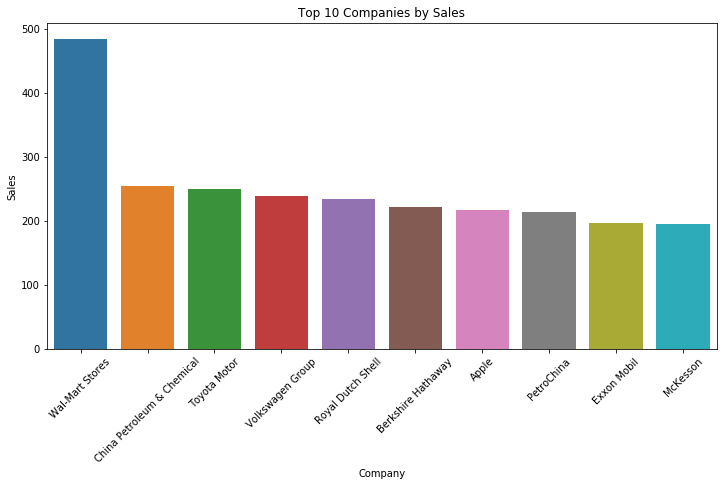

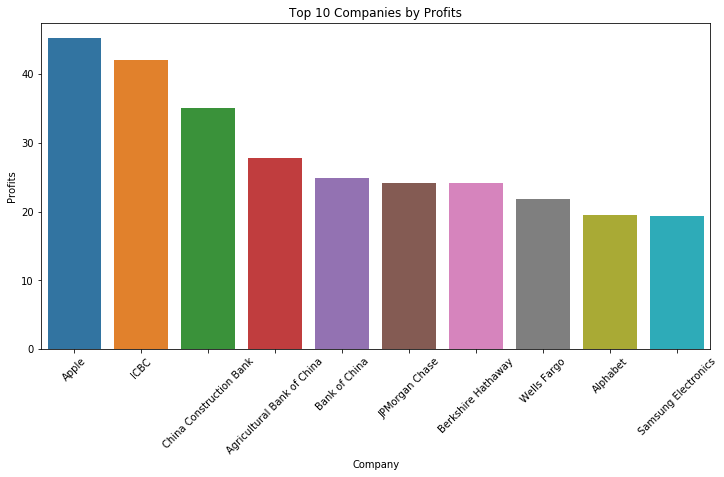

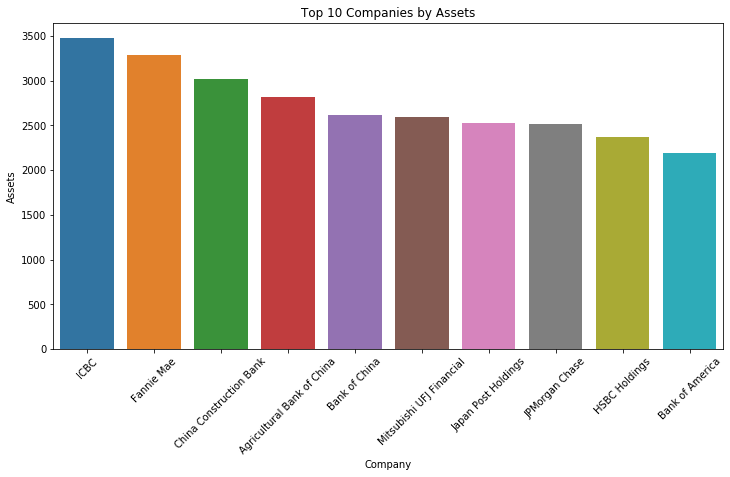

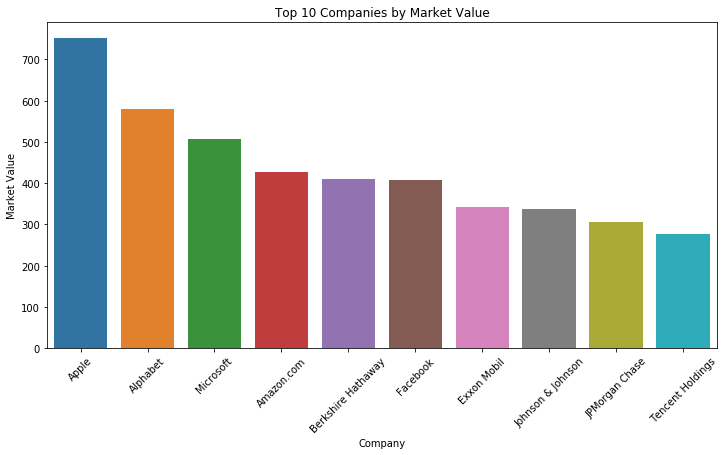

In [12]:
plot_top_10('Sales')
plot_top_10('Profits')
plot_top_10('Assets')
plot_top_10('Market Value')